In [211]:
%load_ext autoreload
%autoreload 2

import torch as t
from gninvert.nn import GeneralLinearFullNet
import matplotlib.pyplot as plt
from gninvert.data_generation import generic_shuffle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
t.manual_seed(42)
model = GeneralLinearFullNet(1, 1, [100], nonlinearity=t.nn.GELU, end_with_nonlinearity=False)
optimizer = t.optim.SGD(model.parameters(), lr=0.01)
xs = t.arange(0, 1, 0.001)[1:].unsqueeze(dim=-1)
xs = generic_shuffle(xs)
ys = xs.clone()
loss_history = []
vxs = t.arange(0, 1, 0.001)[1:].unsqueeze(dim=-1)
vys = vxs.clone()

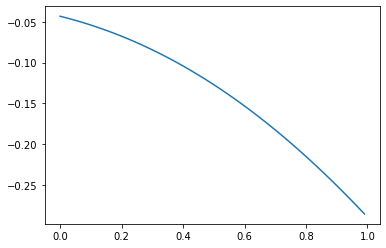

In [213]:
plt.plot(
    t.arange(0, 1, 0.01),
    model(t.arange(0, 1, 0.01).unsqueeze(dim=-1)).detach().clone())

In [214]:
for epoch in range(200):  # loop over the dataset multiple times
    bs = 64
    loss_func = t.nn.MSELoss()
    for i in range(0, xs.shape[0] // bs):
        bxs = xs[i*bs : (i+1) * bs]
        bys = ys[i*bs : (i+1) * bs]
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(bxs)
        loss = loss_func(outputs, bys)
        loss.backward()
        optimizer.step()
        
    loss_history.append(loss_func(model(vxs), vys).item())

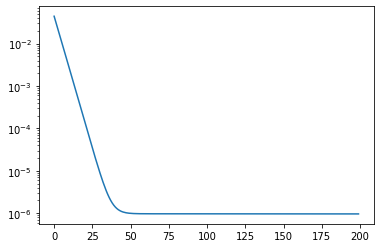

In [215]:
plt.plot(loss_history)
plt.yscale('log')

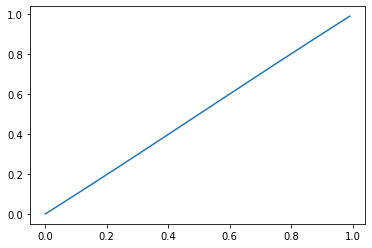

In [216]:
plt.plot(
    t.arange(0, 1, 0.01),
    model(t.arange(0, 1, 0.01).unsqueeze(dim=-1)).detach().clone())

In [217]:
model(t.tensor([0.5]))

tensor([0.5000], grad_fn=<AddBackward0>)

<gninvert.data_generation.TrainingData, 750 train size / 250 validation size / shuffle True>


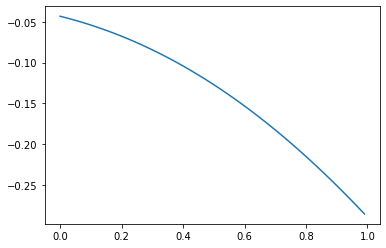

In [512]:
from gninvert.data_generation import TrainingData
from gninvert.training import fit

t.manual_seed(42)
model2 = GeneralLinearFullNet(1, 1, [100], nonlinearity=t.nn.GELU, end_with_nonlinearity=False)

xs = t.arange(0, 1, 0.0015)[1:].unsqueeze(dim=-1)
xs = generic_shuffle(xs)
ys = xs.clone()
loss_history = []

vxs = t.arange(0, 1, 0.001)[1:].unsqueeze(dim=-1)
vys = vxs.clone()

tdata = TrainingData(
    t.arange(0, 1, 0.001).unsqueeze(dim=-1),
    t.arange(0, 1, 0.001).unsqueeze(dim=-1),
    shuffle_seed=0
)
print(tdata)

plt.plot(
    t.arange(0, 1, 0.01),
    model2(t.arange(0, 1, 0.01).unsqueeze(dim=-1)).detach().clone())
plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]

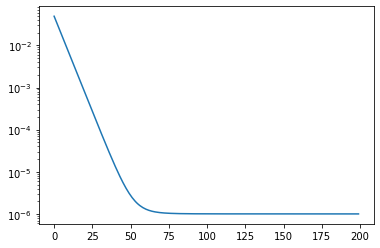

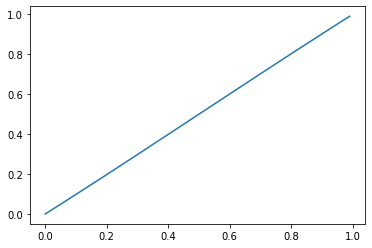

In [513]:
loss_history = fit(
    epochs=200,
    model=model2,
    loss_func=t.nn.MSELoss(),
    opt=t.optim.SGD(model2.parameters(), lr=0.01),
    train_ds = tdata.train_ds(),
    valid_ds = tdata.valid_ds(),
    batch_size=64,
    progress_bar=True
)
plt.plot(loss_history)
plt.yscale('log')
plt.show()
plt.plot(
    t.arange(0, 1, 0.01),
    model2(t.arange(0, 1, 0.01).unsqueeze(dim=-1)).detach().clone()
)

In [514]:
model2(t.tensor([0.5]))

tensor([0.5001], grad_fn=<AddBackward0>)